<a href="https://colab.research.google.com/github/philine-bommer/QuantusXClimate-Tutorial/blob/main/CCAI_Tutorial_Quantus_x_Climate_Applying_explainable_AI_evaluation_in_Climate_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MIT License
#
#@title Copyright (c) 2021 CCAI Community Authors { display-mode: "form" }
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Quantus x Climate — Applying Explainable AI Evaluation in Climate Science

Author(s):
*   Philine Lou Bommer, TU Berlin\ATB Potsdam, pbommer@atb-potsdam.de
*   Anna Hedstroem, TU Berlin\ATB Potsdam, ahedstroem@atb-potsdam.de
*   Marlene Kretschmer, University of Reading\University of Leipzig, m.j.a.kretschmer@reading.ac.uk
*   Marina M.-C. Hoehne, University of Potsdam\ATB Potsdam, mhoehne@atb-potsdam.de

# Table of Contents


*   [Overview](#overview)
*   [Climate Impact](#climate-impact)
*   [Target Audience](#target-audience)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data and Network Description](#data-description)
*   [Introduction: Choosing a XAI method](#Intoduction)
*   [Quantus](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


# 0) Preliminaries

Note that to execute this notebook you will need access to the following websites, i.e. accounts :
* [Create Google account](https://support.google.com/accounts/answer/27441?hl=de)
* Create Kaggle account: which you can do via [Google](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F) or via your [email](https://www.kaggle.com/account/login?phase=emailRegister)

**Note** that runtime issues may arise if the notebook is run on a GPU-based runtime. Please make sure to run **only** on TPU/None Hardware accelerator

<a name="overview"></a>
# 1) Overview

<!--This notebook is a tutorial for applying the XAI evaluation package [Quantus](https://quantus.readthedocs.io/en/latest/) to Explainable AI used to explain a climate change AI problem.
We show how to use Quantus to evaluate explanation properties such as robustness, faithfulness, complexity, localization and randomization and to-->

The goal of this tutorial is to provide a practical introduction to the XAI evaluation and the according package [Quantus](https://quantus.readthedocs.io/en/latest/), aimed at helping climate researchers addressing the complex task of selecting the right explanation method for a given task, model and dataset.

To make users aware of the problem in the climate context and target climate data directly, we base this tutorial on an example of recent climate research. To this end, we innvestigate a convolutional neural network (CNN) ([Bommer et. al., 2023](https://arxiv.org/abs/2303.00652)), trained to solve a climate change prediction task proposed by [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464). The CNN assigns annual global temperature maps to classes based on their decade (see step 1 in the Figure below). Since the network has access to all pixels on the longitude-lattitude grid, it can use not only the global temperature trend due to climate change (increasing mean global temperature) but also regional patterns.
[Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464) apply the explainability method, layer-wise relevance propagation (LRP) to identify regional temperature signals used by their network to make its prediction (for more details see [publication](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464)).

In this tutorial based on [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652), we apply multiple exlanation methods to the predictions of a trained network, to demonstrate the variations between different explanation methods for the same prediction (see step 2 in the Figure below).
To showcase that different XAI methods may suggest different importance of the same region and can thereby lead to scientifically misleading conclusion, we investigate the North Atlantic (NA) region. This region is known to include the NA cooling patch/warming hole, a contributing regional temperature signal, which was previously linked to a change in the NA climate variability in the course of climate change. As prior work by [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464) identifies this region as impactful to the network prediction, the NA is an example for features which can be used to i) investigate whether the network has learned physically relevant features, i.e. validate the network or ii) infer deeper insights about the differences of the importance of the feature for different decades. However, to draw these conclusions we have to ensure that the presented explanations are relieable (see also [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652)).

<br>
<center><img src="https://github.com/philine-bommer/Climate_X_Quantus/blob/main/FinalFirstGraph_v1.png?raw=true" width=800></center>



## 1.1 Content

A brief introduction to the content of the tutorial as follows:

* We start by providing the users with research example classification task described above, including pre-processed input data and labels and a pre-trained CNN ([Section 3. Data and Network Description](#data-description)). We inspect the data by plotting the longitude-lattitude grid and the global mean temperature trends. To assess the network we demonstrate the predictions and provide intuition for the classes.

* In the following [Section 4. Explanation Method Selection](#xai_methods), we introduce [Quantus](https://quantus.readthedocs.io/en/latest/) and present six  different explanation techniques, i.e., VanillaGradients, IntegratedGradients, SmoothGrad, GradientsInput, Occlusion and GradCAM which are employed to help explain the temperature predictions. To emphasize the significance of evaluating XAI methods in climate change research, we concentrate on the NA Region $10-80^{\circ}$W, $20-60^{\circ}$N of temperature maps. We demonstrate that assessing the regions' importance and impact on the network prediction is challenging, as different explanation methods disagree in their feature importance. We show that different explanations can indicate different importance in the same region and subsequently lead to different scientific insights or misleading conclusions about the network decision-making process.

* In [Section 5. XAI Evaluation](#xai_eval) we demonstrate that XAI evaluation can be performed by assessing properties of explanation methods, e.g., robustness, faithfulness, localisation, complexity and randomisation. We introduce the different metrics for each property and show how to calulate, aggregate and normalize the evaluation scores.

* Lastly, we return to our motivating example. On this example we show, how to use Quantus to perform an insightful XAI method comparison and rank the different explanation method in application to our prepared network task. Moreover, we show that using XAI evaluation we can quantitatively determine not only an appropriate explanation method but also the strengths and weaknesses of each method (see [Section Results & Discussion](#results-and-discussion)).


<a name="background"></a>
## 1.2. Background
This tutorial is based on the primary publication by [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652) providing an introducion to XAI evaluation in the climate context and in-depth **analysis of XAI evaluation for climate science** based on the **Quantus package**. The according source code can be found in [Github repository](https://github.com/philine-bommer/Climate_X_Quantus).  

**Quantus.** The Quantus package has been developed by [Hedström et al., 2023](https://www.jmlr.org/papers/v24/22-0142.html). The according source code cand be found in the corresponding [Github repository](https://github.com/understandable-machine-intelligence-lab/Quantus).


Subsequently, the tutorial will provide participants with the tools to facilitate well-founded and trustworthy climate XAI research.

<a name="goals"></a>
## 1.3 Goals
Overall, with this tutorial we aim to:
* demonstrate the challenge of choosing a reliable explanation method in your climate AI research
* showcase how to apply of different evaluation metrics
* discuss and demonstrate how to make task-specific adjustment of evaluation metrics to climate data
* demonstrate how to interpret evaluation metric scores
* provide a guideline for comparing and selecting an explanation method given a specific research problem


<a name="climate-impact"></a>
##1.4 Climate Impact
Explainable artificial intelligence (XAI) is required for a reliable and trustworthy application of AI, as explanation methods help to understand the reasons for the predictions of the deep neural networks (DNNs). In climate science XAI has been applied successfully to validate DNN models while providing researchers with new insight into physical processes ([Ebert-Uphoff and Hilburn, 2020](https://journals.ametsoc.org/view/journals/bams/101/12/BAMS-D-20-0097.1.xml), [Hilburn et al., 2021](https://journals.ametsoc.org/view/journals/apme/60/1/jamc-d-20-0084.1.xml)).

Nonetheless, due to the increasing number of XAI methods, establishing the optimal procedure for a given task becomes more and more complex. Previous works ([Krishna et al., 2022](https://arxiv.org/abs/2202.01602)) show that researchers and XAI users can be overwhelmed by the different explanation methods at hand. As visual comparison is mostly unintelligible due to the lack of ground truth explanations, these practitioners tend to choose a XAI method based upon popularity or easy-access. These uninformed and unverified choices of XAI methods can lead to the inference of misleading information about the network decision. For example, in cases where XAI is used to validate a skillful forecast of a DNN ([Gibson et al., 2021](https://www.nature.com/articles/s43247-021-00225-4)), the misleading evidence can convey trust in the prediction of a network potentially considering data artifacts, which were not or wrongly displayed in the explanation.

With this tutorial we aim to help climate researchers tackle the complex task of choosing the optimal XAI method, by providing the participants with a practical introduction to the XAI evaluation package *Quantus*. We show that using XAI evaluation we can quantitatively determine not only the most reliable explanation method but also the strengths and weaknesses of each method. Subsequently, the tutorial will provide participants with the tools to facilitate well-founded and trustworthy climate XAI research.

<a name="target-audience"></a>
##1.5 Target Audience
The tutorial is intended for climate science researchers that are interested in or have already been working with AI solutions and explanation methods. Prior experience with applications of DNN to climate data is required. Moreover, the audience should be familiar with climate science data and temperature maps.



<a name="prereqs"></a>
## 1.6 Prerequisites

We do not discuss general deep learning methods, as we plan to present an already established network task with a trained network and input-output pairs. Accordingly, basic knowledge about DNNs applied to climate data, is required. Moreover, we use open-source XAI packages and we will not provide an in-depth introduction to the different XAI methods. However, we plan to shortly discuss the different explanation methods. Therefore rudimentary XAI knowledge, would be beneficial but is not required. Lastly, participants do not need any prior knowledge about the field of XAI evaluation.


## 1.7 Other References
For further study on XAI General, XAI Evlaution and XAI x Climate Science, please see the additional resources as follows:

On the topic of XAI in general, we recommend:
* XAI package for PyTorch, [Captum](https://captum.ai/)
* XAI package for tensorflow 1,2 [Innvestigate](https://github.com/albermax/innvestigate)
* [General XAI Repository with Tutorials](https://github.com/PaddlePaddle/InterpretDL)
* To choose XAI for **Regression**, [Letzgus et. al. 2022](https://ieeexplore.ieee.org/document/9810062) with [Github](https://github.com/sltzgs/xai-regression)

On the topic of XAI evaluation:
* [Short Course 2023 - Introduction to AI Interpretability](https://introinterpretableai.wordpress.com) by Graziani et al., (2022)
* [NLDL 2023 - Winter School Presentation on XAI Evaluation](https://drive.google.com/file/d/1RfPxkqfLSlQp6WqImRjYNSeFHq77dMJE/view) by Hedström (2023)

On the topic of XAI x Climate Science:
* [Github to the primary publication by *Bommer et. al. 2023*](https://github.com/philine-bommer/Climate_X_Quantus)
* [MLP Benchmark dataset for XAI comparison](https://www.cambridge.org/core/journals/environmental-data-science/article/neural-network-attribution-methods-for-problems-in-geoscience-a-novel-synthetic-benchmark-dataset/DDA562FC7B9A2B30710582861920860E) including [Github repository](https://github.com/amamalak/Neural-Network-Attribution-Benchmark-for-Regression)
* [CNN Benchmark dataset for XAI comparison](https://arxiv.org/abs/2202.03407) including [Github](https://github.com/amamalak/XAI_Fidelity_Assessment_CNN_GEO)

Previous Tutorials on Quantus:
*  [Quantus Tutorial on ImageNet](https://colab.research.google.com/github/understandable-machine-intelligence-lab/Quantus/blob/main/tutorials/Tutorial_ImageNet_Example_All_Metrics.ipynb)

### 1.7.1 Videos
Here you find a video introduction on the Quantus toolkit, including a general introduction of the library content and XAI evaluation, as well as a live coding on state-of-the art image classification datasets.

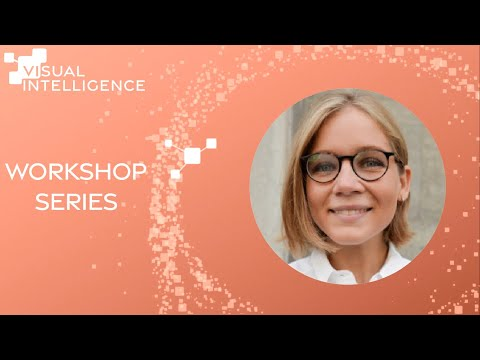

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('68IPFQjc5FE')
# A more recent video: http://www.birs.ca/events/2022/5-day-workshops/22w5055/videos/watch/202205021029-Hedstroem.html

<a name="software-requirements"></a>
# 2) Software Requirements
The Python version at the time of this submission in Colab = Python 3.7.14.

The following libraries are required:
*   pandas (v1.3.5)
*   numpy
*   matplotlib
*   Quantus
*   Tensorflow

In [ ]:
%%capture
!pip install quantus >=0.3.5
!pip install tf_explain==0.3.1
!pip install tensorflow

In [ ]:
# Python standard libraries.
from typing import Any
import copy

# Libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data manipulation.
import pandas as pd
import numpy as np

# Libraries for XAI and ML methods.
import quantus
import tensorflow as tf
from tensorflow import keras
from tf_explain import *

# Remove warnings.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

If you use Google Colab, please restart the runtime after running the above cell.

See all package requirements.

In [ ]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.1

<a name="data-description"></a>
# 3) Data and Network Description

For the data and network task, we build upon previous work on a climate change classification task by [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464), using data simulated by a fully-coupled general climate model, Community Earth System Model version 1 ([Hurrell et al., 2013](https://journals.ametsoc.org/view/journals/bams/94/9/bams-d-12-00121.1.xml)). In particular, we focus on the $40$ member larger ensemble climate data simulation, with equal external forcings across all ensemble members but differing atmospheric initial conditions ([Kay et al., 2015](https://journals.ametsoc.org/view/journals/bams/96/8/bams-d-13-00255.1.xml)). For the data from $1920$ to $2080$, historical forcings are imposed for $1920-2005$ and Representative Concentration Pathways 8.5 for the following years. We employ 2-m air temperature (T2m) temperature maps and take the annual average of monthly data.

[Link to Data and Network](https://www.kaggle.com/datasets/philinelou/climatexquantusiclr2023?select=Batch_data.npz)


**Data.** You can load the already pre-processed and prepared batch of the data containing $N = 155$ images (1 sample per correctly predicted year) from an .npz-file into the notebook, as uploaded on Kaggle. Moreover, we provide a trained CNN (.tf-files) and according input temperature maps as images on a $h = 144$ by $v = 95$ longitude-latitude-grid with $1.9^{\circ}$ sampling in latitude and $2.5^{\circ}$ sampling in longitude. For the dataset, we include the associated class vectors (probability entry for each class) and the years of each temperature map in the input data.


**Network.** As described in the section 1, the network assigns the annual temperature maps to classes based on their decade. Similar to [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464) we define classes for the full two centuries ($1900-2100$), resulting in a class vector of $20$ classes. Each class vector entry includes the probability of the input sample belonging to the decade of the class ([Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464) uses fuzzy classification, meaning that multiple classes can achieve non-zero probability and aims to predict the year of each temperature map).
The inputs are passed as images with the latitude-longitude grid described in the previous paragraph.  



## 3.1 Data and Pre-trained Network Download

To run the notebook, we need to download the data and the trained network.

We have prepared the both data and trained network as uploaded on [Kaggle](https://www.kaggle.com/datasets/philinelou/climatexquantusiclr2023) which is publically available.

Please follow these steps:

1. Create a Kaggle API token following the [Instructions Step #3](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/).
2. When running the cell below and when asked to choose a file, upload `kaggle.json`.
3. After the cell has finished running, check that `dataset.npz`, `index.npz` and `tf_network.tf` exist in `/drive/sample_data/`

In [ ]:
from google.colab import files

# Upload the kaggle.json file.
files.upload()
!ls -lha kaggle.json

# Install the kaggle package.
!pip install -q kaggle

# Create .kaggle folder where the key should be placed.
!mkdir -p ~/.kaggle

# Move the key to the folder.
!cp kaggle.json ~/.kaggle/

# Check the present working directory
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset.
!kaggle datasets download -d philinelou/climatexquantusiclr2023 -p /content/drive/sample_data
!unzip /content/drive/sample_data/climatexquantusiclr2023.zip -d /content/drive/sample_data/

%cd /content/drive/sample_data/

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 66 Apr 11 09:06 kaggle.json
 99% 162M/163M [00:02<00:00, 86.4MB/s]
100% 163M/163M [00:02<00:00, 75.4MB/s]
Archive:  /content/drive/sample_data/climatexquantusiclr2023.zip
  inflating: /content/drive/sample_data/README.md  
  inflating: /content/drive/sample_data/dataset.npz  
  inflating: /content/drive/sample_data/index.npz  
  inflating: /content/drive/sample_data/tf_network.tf/tf_network.tf/keras_metadata.pb  
  inflating: /content/drive/sample_data/tf_network.tf/tf_network.tf/saved_model.pb  
  inflating: /content/drive/sample_data/tf_network.tf/tf_network.tf/variables/variables.data-00000-of-00001  
  inflating: /content/drive/sample_data/tf_network.tf/tf_network.tf/variables/variables.index  
/content/drive/sample_data


In [ ]:
# Inspect that you have the data and model in place.
!ls /content/drive/sample_data

climatexquantusiclr2023.zip  dataset.npz  index.npz  README.md	tf_network.tf


### 3.1.1 Inspect Data Objects
In the following cells you can load and inspect the data. Alongside input images, labels and years of each image we also included a segmentation map of the NA region ($10-80^{\circ}$W, $20-60^{\circ}$N), which we use for explanation evaluation in [Section 5.](#xai_eval)).


In [ ]:
# Load the full data object.
data = np.load('dataset.npz', allow_pickle=True)

# Input images.
x_batch = data['x_batch'].swapaxes(1,3).swapaxes(1,2)

# Classification labels.
y_batch = data['y_batch']

# Segmentation masks for explanations.
s_batch = data['s_batch'].reshape(len(x_batch), 1, 95, 144)

# Years of the input images.
years_batch = data['years_batch']

# Longitude and latitudes.
latitude = data['wh'][0]
longitude = data['wh'][1]

**Plot Temperature Maps.**
To provide an intuition for the T2m temperatur maps passed as input to the network, in the following we visualize the data. Below you can find a plot where 4 temperature maps from the years $1940$, $1990$, $2040$ and $2074$.

In [ ]:

# @title Plotting functionality
def plot_multiple_temperature_maps(
    samples: np.array,
    x_samples: Any,
    year_samples: np.array,
    y_true_samples: np.array,
    y_pred_samples: np.array,
    latitude: np.array,
    longitude: np.array,
    **plt_kwrgs
) -> None:
    """Plot multiple temperature maps with input data and predictions."""

    # Set plot settings.
    nrows = plt_kwrgs.get('nrows', 2)
    ncols=plt_kwrgs.get('ncols', len(samples)//nrows)
    indx = plt_kwrgs.get('indx_order', [])
    keys = plt_kwrgs.get('keys', [])
    figsize = plt_kwrgs.get('figsize', (20,10))
    cb_pos = plt_kwrgs.get('cb_pos',[0.35, 0.05, 0.35, 0.05])
    xtext = plt_kwrgs.get('xtext', -0.2)
    font = plt_kwrgs.get('font', 18)
    set_title = plt_kwrgs.get('set_title', 1)
    globe = plt_kwrgs.get('globe',1)

    if any(indx):
      k = 0

    # Transform to make global visualization easier. (similar to cartopy PlateCarree transform).
    if globe:
      longitude = (longitude + 180) % 360 - 180
      longitude = np.roll(longitude, shift = int(len(longitude) / 2), axis =0)
      latitude = np.flip(latitude, axis =0)


    # Plotting configs.
    fig1, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize,)
    xtick = [longitude[1], longitude[int((len(longitude) - 1) / 2)], longitude[len(longitude) - 1]]
    ytick = [latitude[1], latitude[int((len(latitude) - 2) / 2)], latitude[len(latitude) - 1]]
    maxabs = np.abs(x_samples).max()


    for i in range(nrows):

        # Choose data and according cmap.
        if any(keys) and i > 0:
            key = keys[i-1]
            explanations = plt_kwrgs['explanation']
            x_samp = explanations[keys[i-1]]
            cmap = "seismic"
            mins = -1
            maxs = 1

        elif any(keys) and i == 0:
            key = 'T2m'
            cmap = "coolwarm"
            x_samp = x_samples[:,:,:,0]
            mins = -np.abs(x_samp).max()
            maxs = np.abs(x_samp).max()

        elif any(indx):
            key = 'T2m'
            cmap = "coolwarm"
            x_samp = x_samples[:,:,:,0]
            mins = -np.abs(x_samp).max()
            maxs = np.abs(x_samp).max()


        for j in range(ncols):

            # Reformat the data.
            if any(indx):
                data = x_samp[k, :, :]
                k+=1
            else:
              data = x_samp[j, :, :]


            # Transform to make global visualization easier. (similar to cartopy PlateCarree transform).
            if globe:
              data = np.roll(data, shift = int(len(longitude) / 2), axis =1)
            data = np.flip(data, axis =0)

            ax1 = axes[i,j]

            im = ax1.imshow(data, cmap=cmap, vmin=mins, vmax=maxs)
            ax1.grid()

            # Ticks, labels.
            if i == 0:
                if nrows == 1:
                    ax1.set_title(
                        r"%s, true class %s, pred. class %s"
                        % (int(year_samples[j]), int(y_true_samples[j]),
                        int(y_pred_samples[j])),fontsize=18,
                    )
                elif set_title:
                    ax1.set_title(
                        r"%s"
                        % (int(year_samples[j])),
                        fontsize=18,
                    )
            else:
               if any(indx) and set_title:
                    ax1.set_title(
                        r"%s"
                        % (int(year_samples[k-1])),
                        fontsize=18,
                    )

            ax1.set_xticks([0, int((len(longitude) - 1) / 2), len(longitude) - 1])
            ax1.set_xticklabels(xtick, fontsize=12)
            ax1.set_yticks([0, int((len(latitude) - 2) / 2), len(latitude) - 1])
            ax1.set_yticklabels(ytick, fontsize=12)

            if j == 0:
                ax1.set_ylabel("latitude")
            if j == 0:
                ax1.annotate(r'%s' % key, xy=(0, 0), xytext=(xtext, 0.5),
                                textcoords='axes fraction', color='black', fontsize=font,
                                rotation=90, ha='center', va='center')
            if i == ncols-1:
                ax1.set_xlabel("longitude")


        # Colorbar for input plot.
        if nrows == 1 or any(indx):
            cbar_ax = fig1.add_axes(cb_pos)
            cbar1 = fig1.colorbar(im, cax=cbar_ax, orientation="horizontal")
            cbar1.ax.tick_params(axis="x", size=0.02, labelsize=14)
            cbar1.ax.set_xlabel('T',fontsize =16)

    plt.show()

With the supporting function as defined above, we plot the temperature maps for some input samples. The colorbar range in the following plot refers to the range of the standardized temperature values (unitless here defined by T).

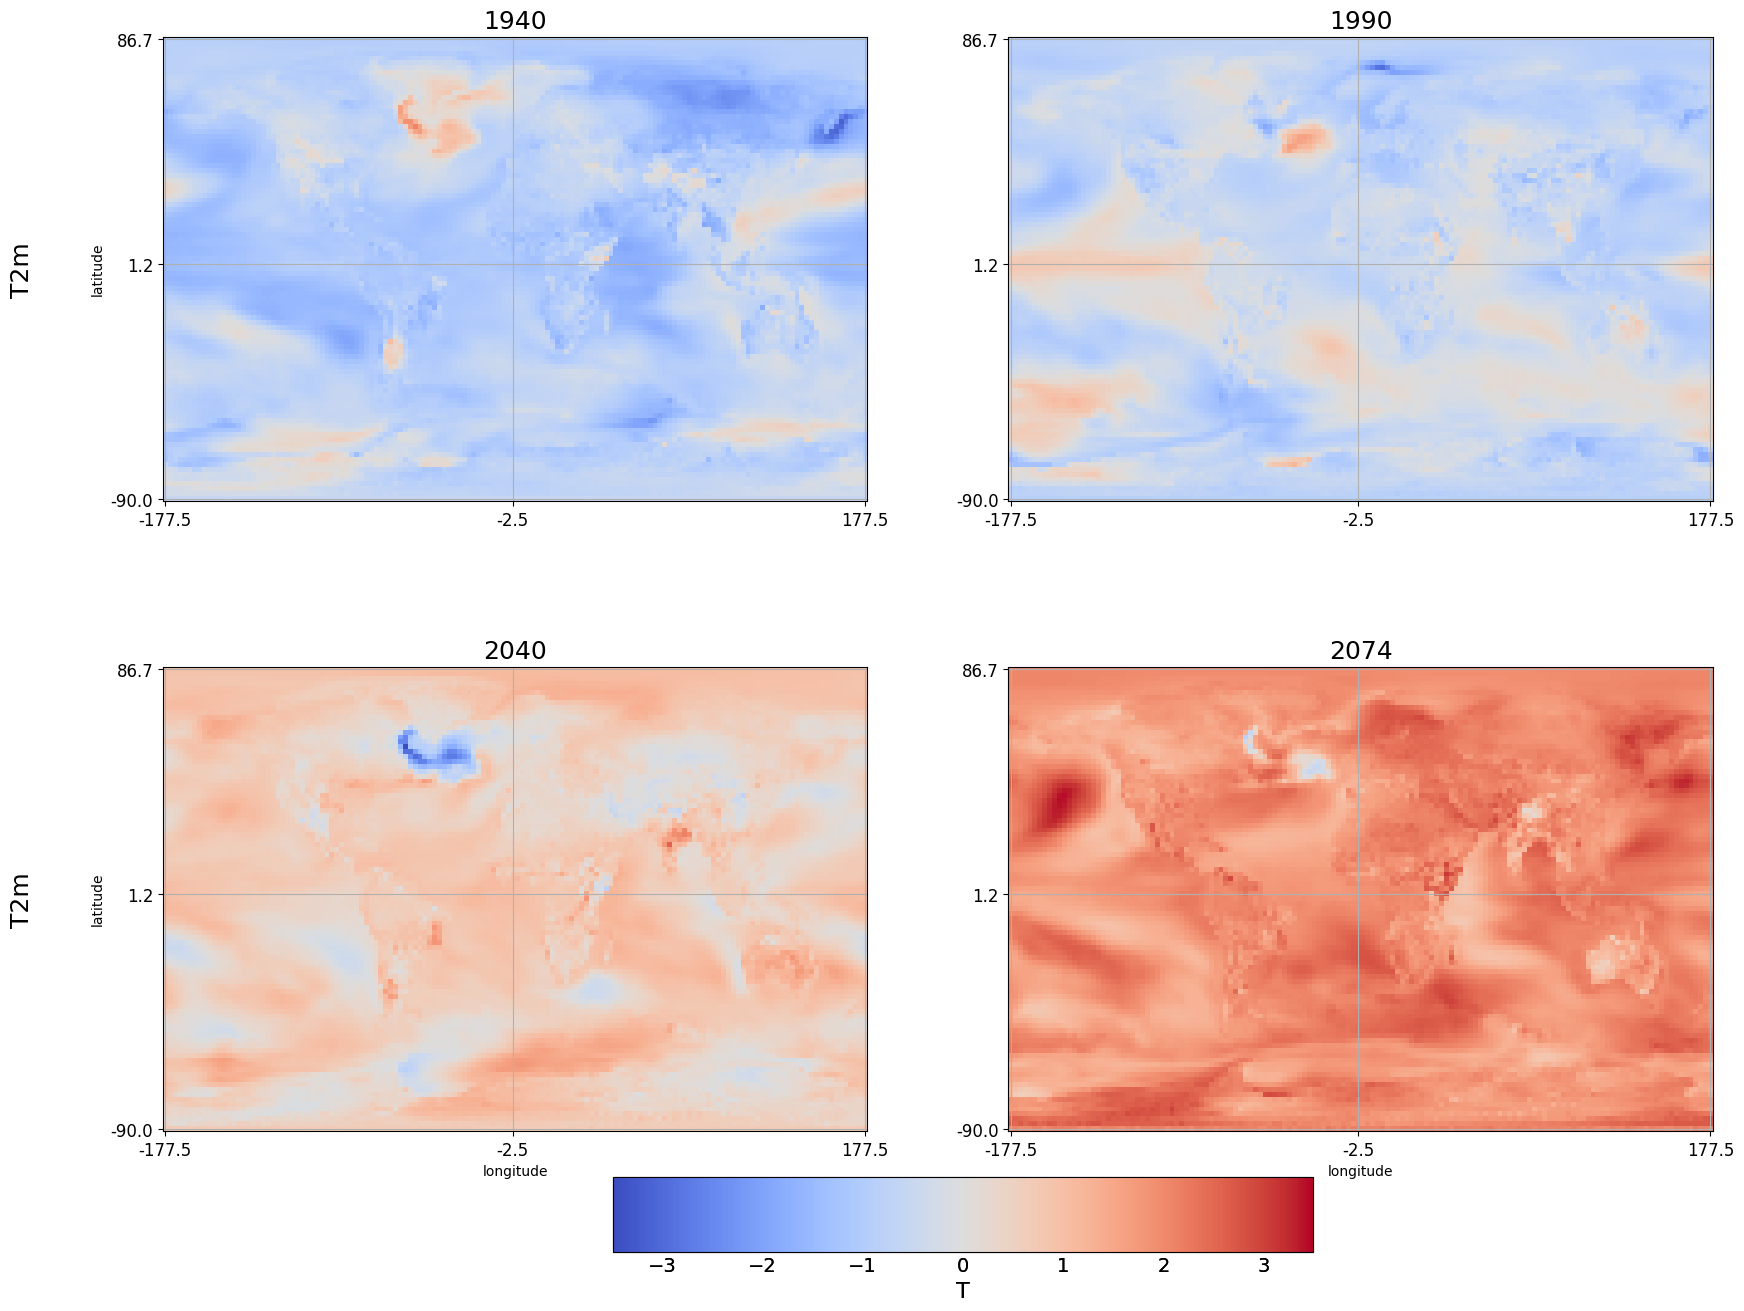

In [ ]:
# Prepare random year samples.
year_s = np.array([1940, 1990, 2040, 2074])
samples = [np.where(years_batch == ys)[0][0] for ys in year_s]

y_batch_samples = y_batch[samples]
s_batch_samples = s_batch[samples, :]
year_samples = years_batch[samples]
x_batch_samples = x_batch[samples, :]


# Plot!
plt_kwrgs = {'indx_order': [len(samples)],
             'figsize': (20,15)}

plot_multiple_temperature_maps(samples, x_batch_samples, year_samples, y_batch_samples, [], latitude, longitude,**plt_kwrgs)

**Data inspection.** These 4 samples in the order of our time range from earliest $1940$ to latest year $2074$ already indicate the globally increasing temperature trend inherent to the data alongside different regional temperature signals, who's impact on the network prediction we aim to assess in the next section using explainability.

To further insepect the data, below, we also visualize the temporal temperature trend in a line plot of the global average across longitude and latitude. The plot demonstrates the strong increase in average annual temperature which starts to manifest after $1960$ and becomes more pronounced in $1980$. The graph is also in line with other reports of the average global temperature in the RPC 8.5. scenario.  

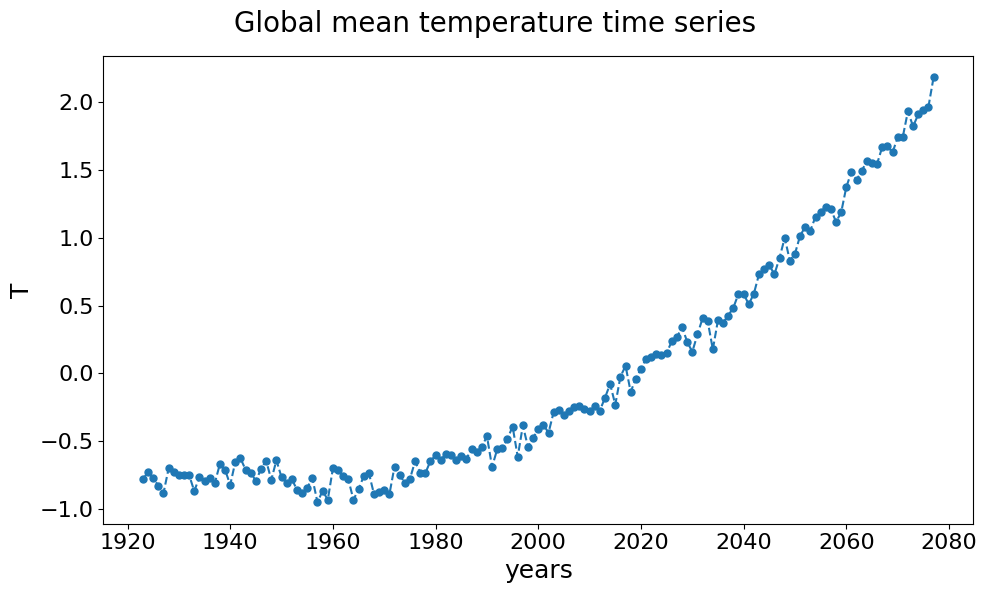

In [ ]:
# Line plot of global average temperature over all years provide in the batch.

# Calculate global mean temperature per year.
x_mean_batch = x_batch.mean(axis = (1,2))

# Plot time series.
fig2 = plt.figure(figsize = (10, 6))
plt.plot(years_batch, x_mean_batch[:,0], linestyle="--", marker="o",markersize=5)
fig2.suptitle('Global mean temperature time series', fontsize=20)
plt.xlabel('years',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('T',fontsize=18)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

### 3.1.2 Inspect Model Objects
In the following cells you can load and inspect model.

The trained model follows the implementation and training procedure performed in the [primary publication by Bommer et. al., 2023](https://arxiv.org/abs/2303.00652) and described in **section 2.2 of the publication**, listing also the hyperparameters as well as model structure. We also show the model structure in the diagram below, consisting of a single convolutional layer (kernel size $=6x6$), one max-pooling layer (stride $=2$), a fully connected ($20$ neurons, with relu-activation) and the output (softmax, with $20$ neurons) layer, which calculates the probability for each class.

<br>
<center><img src="https://drive.google.com/uc?id=1__WK9c3eDss5KWTGWsR0OCJL0vxXpZUG" width=500></center>


In [ ]:
# Load the network object.
model = keras.models.load_model('tf_network.tf/tf_network.tf')

# Load the network parameters.
network_params = data['NetworkParams']

In [ ]:
# Run the model on a test sample, requiring a compilation.
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              loss='binary_crossentropy',
              metrics=[keras.metrics.categorical_accuracy],)

# Predict with the model.
pred = model.predict(x_batch)
pred_class = np.argmax(pred, 1)
pred_class


5/5 [==============================] - 2s 288ms/step


array([ 2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17])

The integers shown above indicate the decade class in the time range $1900-2100$ in ascending order.
As described at the beginning of this section, based on [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464) we also include $1900-1909$ as class $0$, $1910-1919$ as class $1$, $2080-2089$ as class $18$ and $2090-2099$ as the last class, $19$. All other classes follow similarly, e.g. $2$ corresponds to $1920-1929$.

<a name="introduction"></a>
# 4) Explanation Method Selection


To gather more insight into how the model made its prediction, we can apply different explanation methods.

In [ ]:
import quantus


### 4.1 Introducing Quantus

For this purpose, we can use [Quantus](https://github.com/understandable-machine-intelligence-lab/Quantus) which is a XAI Python toolkit to evaluate neural network explanations. While the library is focused on providing XAI evaluation (it offers 30+ metrics in 6 categories for XAI evaluation, supporting different data types (image, time-series, tabular, NLP next up!) and models (`PyTorch` and `TensorFlow`)!), to get started, Quantus also offers some built-in explainability functionality, covering of the most standard explanation methods. Currently, `Quantus` is limited to classification tasks (for explanations to regression tasks please see *Section 1.7. Other References*).

Quantus is built to address the need in XAI to quantify the performance of different explanation methods and is developed to be an easy-to-use yet comprehensive toolbox for quantitative evaluation of explanations. More details on what Quantus library includes and how it can be used for research can found in [Section XAI Evaluation](#xai_eval) below or at the offical [GitHub repository](https://github.com/understandable-machine-intelligence-lab/Quantus) or [API documentation](https://quantus.readthedocs.io/en/latest/). .




In [ ]:
# We load the available XAI methods with tensorflow.
quantus.AVAILABLE_XAI_METHODS_TF

['VanillaGradients',
 'IntegratedGradients',
 'GradientsInput',
 'OcclusionSensitivity',
 'GradCAM',
 'SmoothGrad']

Quantus is compatible with `PyTorch`, offering 20+ XAI methods for that ML framework

In [ ]:
# View the XAI methods available for PyTorch users.
quantus.AVAILABLE_XAI_METHODS_CAPTUM

['GradientShap',
 'IntegratedGradients',
 'DeepLift',
 'DeepLiftShap',
 'InputXGradient',
 'Saliency',
 'FeatureAblation',
 'Deconvolution',
 'FeaturePermutation',
 'Lime',
 'KernelShap',
 'LRP',
 'Gradient',
 'Occlusion',
 'LayerGradCam',
 'GuidedGradCam',
 'LayerConductance',
 'LayerActivation',
 'InternalInfluence',
 'LayerGradientXActivation',
 'Control Var. Sobel Filter',
 'Control Var. Constant',
 'Control Var. Random Uniform']

In the following we will apply and compare all explanation methods available in `tf_explain`. To facilitate an easier understanding of the explanation maps we want to provide a short introduction for the different explanation methods and how they are calculated:

**VanillaGradients** ([Baehrens et al., 2010](https://www.jmlr.org/papers/volume11/baehrens10a/baehrens10a.pdf)):
* explains the network decision by computing the first partial
derivative of the network output $f(x)$ with respect to the input $x$. This explanation method feeds backwards the network’s prediction to the features in the input x, calculating the change in network prediction given a change in the respective features, which corresponds to the network function sensitivity.

**IntegratedGradients** ([Sundararajan et al., 2017](http://proceedings.mlr.press/v70/sundararajan17a/sundararajan17a.pdf)):
* extends InputGradients, by introducing a baseline
datapoint (e.g. a zero or a mean centred image) and computes the explanation based on the difference to
this baseline.

**SmoothGrad** ([Smilkov et al., 2017](https://arxiv.org/abs/1706.03825)):
* aims to filter out the unwanted background noise (i.e., the gradient shattering effect) to enhance the interpretability of the explanation. To this end, random noise is added to the input and the model’s explanations are averaged over multiple noisy versions of the input. The idea behind the average across noisy inputs is that the noise-induced variations in the model’s explanation will
on average highlight the most important features, while suppressing the background noise.

**GradientsInput**:
* is an extension of the VanillaGradients method and extends the information content towards the input image by computing the product of the gradient and the input. The explanation assigns a high
relevance score to an input feature if it is both present in the data and if the model gradient reacts to it.

**OcclusionSensitivity** ([Ancona et. al.,2017](https://arxiv.org/abs/1711.06104)):
* sweeps a patch that occludes pixels over the images, and use the variations of the model prediction to deduce impact of the occluded area on the model prediction.

**GradCAM** ([Selvaraju et. al., 2017](https://arxiv.org/abs/1610.02391)):
* stands for Gradient-weighted Class Activation Mapping and uses the gradients of the classification score w.r.t. the final convolutional layer to understand which parts of the image are most important for classification. The method produces a coarse localization map highlighting important regions in the input image for predicting the class.

**General remark**: Note that `tf_explain` returns the absolute values for the pixels importance with explanation values only ranging from minimum (unimportant) to maximum (important).


## 4.2 Generate Explanations
To showcase how explanation methods can vary across the displayed importance patterns, we compare the explanation maps of six different XAI methods for the same $4$ inputs we visualized above. We normalize all explanations to importance values between $[0,1]$. This can be done with a maximum normalization also provided by Quantus (quantus.functions.normalise_func.normalise_by_max(a_batch, (1,2))). However, note that for GradCAM and OcclusionSensitivity due to average prior to the output layer the minimum is shifted to minimum values $>0$ thus we apply the normalization as implemented below.

In [ ]:
# Generate several explanation methods with Quantus.
xai_methods ={"VanillaGradients": {},
              "IntegratedGradients": {},
              "SmoothGrad": {},
              "GradientsInput": {},
              "OcclusionSensitivity": {"window": (1, 5, 6)}, # window size for the occlusion procedure
              "GradCAM": {"gc_layer": "conv2d", "shape": (1, 95, 144)} # gc_layer - layer of explanation, shape - output shape (1, img. dim., img. dim.)
              }

explanations = {}
for method, kwargs in xai_methods.items():
    a_batch = quantus.explain(model=model,
                            inputs=x_batch[samples,:,:,:],
                            targets=y_batch[samples],
                            **{**{"method": method}, **kwargs})

    # Normalise for GradCAM.
    if a_batch.min() == 0:
        explanations[method] = a_batch/a_batch.max(axis=(1,2), keepdims=True)
    else:
        # If not normalized, normalize by hand to comparable values [0,1].
        explanations[method] = np.abs((a_batch - a_batch.min(axis=(1,2), keepdims=True))/(a_batch.max(axis=(1,2), keepdims=True) -a_batch.min(axis=(1,2), keepdims=True)))

    print(f"{method} - {a_batch.shape}")

VanillaGradients - (4, 95, 144)
IntegratedGradients - (4, 95, 144)
SmoothGrad - (4, 95, 144)
GradientsInput - (4, 95, 144)
12/12 [==============================] - 5s 454ms/step
OcclusionSensitivity - (4, 95, 144)
GradCAM - (4, 95, 144)


### 4.2.1 Plot Explanations
First, we plot the global maps, which already show the different behavior of the explanation methods.

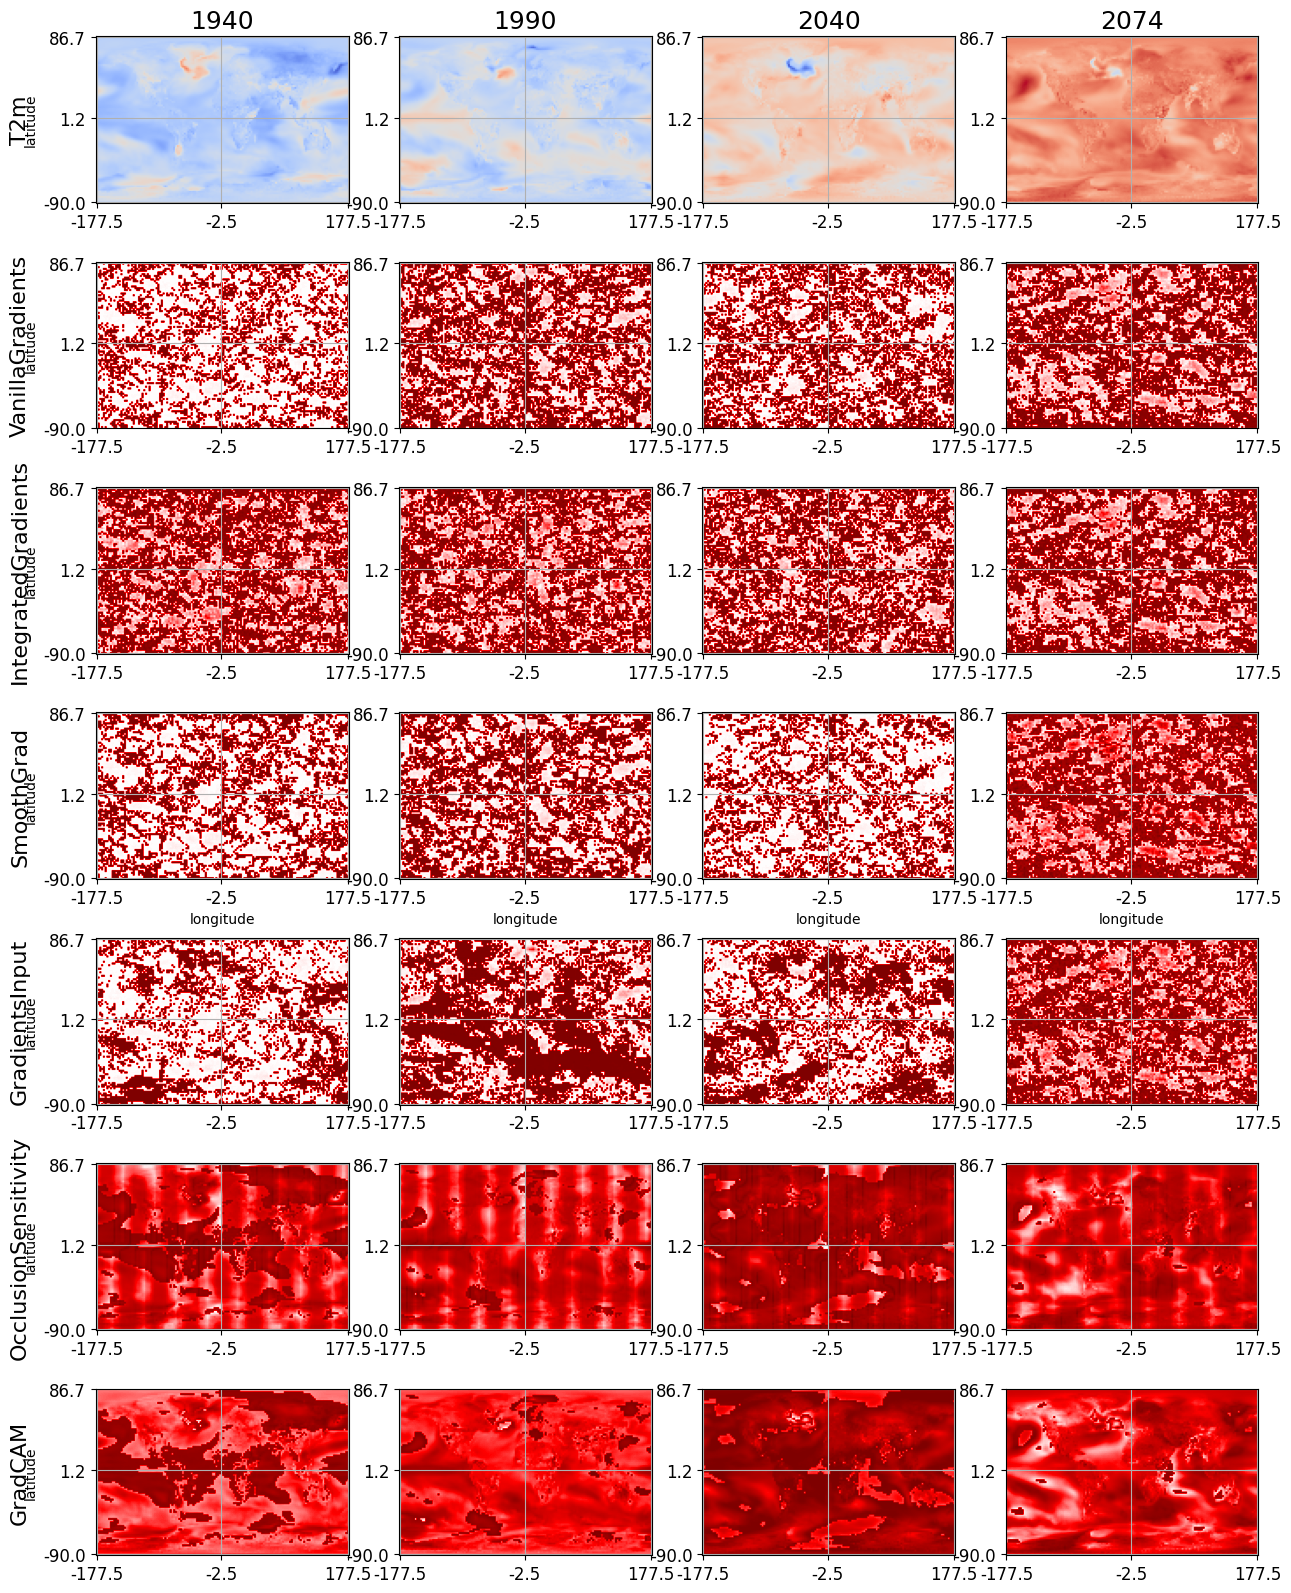

In [ ]:
# Visualise explanations, demonstrating the unintelligibility of visual comparision.
y_pred_samples = pred_class[samples]

plt_kwrgs = {'nrows': len(explanations)+1,
             'ncols':len(samples),
             'font': 16,
             'xtext': -0.3,
             'figsize': (15,20),
             'cb_pos': [0.35, 0.05, 0.35, 0.05],
             'keys': list(xai_methods.keys()),
             'explanation': explanations}

plot_multiple_temperature_maps(samples, x_batch_samples, year_samples, y_batch_samples, y_pred_samples, latitude, longitude, **plt_kwrgs)

**Visualization description** The plotted maps of the first row are the inputs which we explain in the following rows. We use 6 methods and all explanations are normalized between $0$ and $1$ (white to dark red), whereas the input T2m temperature maps are standardized and plotted in the same range as the previous visulization (see colorbar of first plot visulizing the inputs with the prediction). Here, we see especially strong visual differences between the first $4$ explanation methods and the last $2$ which can be related to the difference between the patch-wise and the pixel-wise calculation used for GradCAM/OcclusionSensitivity and gradient-based methods respectively (see description above). But also, the first $4$ rows display incongruences regarding the areas assigned highest importance(dark red patches). This figure already highlights how complicated a visual comparison and visual-based choice is and how different explanations might lead to different interpretation of the model decision.

### 4.2.2 Analyse North Atlantic Region

In the following cells, we show an example of XAI-based analysis in climate science. Since in climate science, primary aims of XAI are to either validate that the network learned features which relate to previously established climate drivers and physical relationships, or to uncover new insights about the research question at hand, we want to provide you with an example.

As discussed in section [1](#overview), the NA region includes contributing regional temperature signal, refered to as warming hole or cooling patch. The signal evolves from a warming region in the 20th century to a cooling patch throughout in 21st century in the course of climate change. The feature was established to contribute to the network prediction (see [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464)). To assess wether the network has learned physically relevant features, by which we could validate the network skill, we want to find out if the patterns of NA cooling patch will recieve high importance (increased values in the explanation).

Plotting at latitude 27.8 - 67.7, longitude -67.5 - -15.0


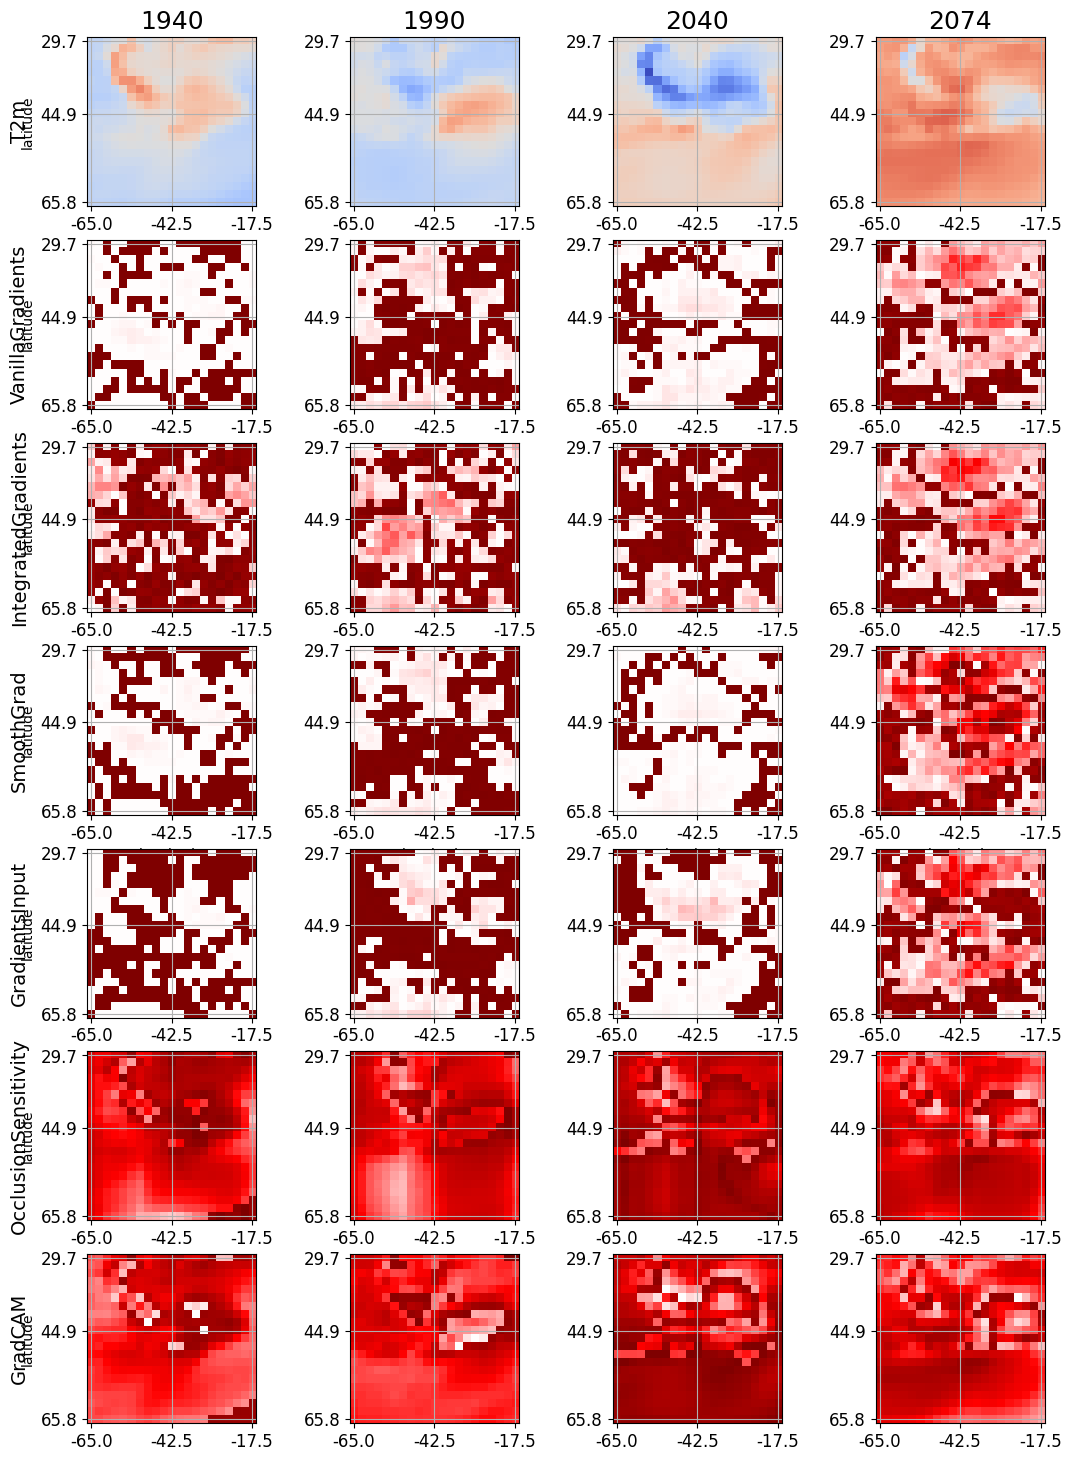

In [ ]:
# When zooming in at the North Atlantic region, we can establish that there is a disagreement in the explainable evidence/ feature importance between the different explanation methods. This may be confusing from a Climate AI practitioner's perspective.

# Transform temperature maps similar to cartopy PlateCarre:
long_tf = (longitude + 180) % 360 - 180

north_atl = [62, 83, 117, 138]
print('Plotting at latitude %s - %s, longitude %s - %s' % (latitude[north_atl[0]],latitude[north_atl[1]], long_tf[north_atl[2]], long_tf[north_atl[3]]))

# Define North Atlantic region data.
x_n_a_samples = x_batch_samples[:,north_atl[0]:north_atl[1],north_atl[2]:north_atl[3],:]
lon_n_a = long_tf[north_atl[2]:north_atl[3]]
lat_n_a = latitude[north_atl[0]:north_atl[1]]

explanations_n_a ={}
for method, values in explanations.items():
  explanations_n_a[method] = values[:,north_atl[0]:north_atl[1],north_atl[2]:north_atl[3]]

# Re-define plot kwargs.
plt_kwrgs['explanation'] = explanations_n_a
plt_kwrgs['figsize'] = (13,18)
plt_kwrgs['font'] = 14
plt_kwrgs['xtext'] = -0.4
plt_kwrgs['globe'] = False


# Plot.
plot_multiple_temperature_maps(samples, x_n_a_samples, year_samples, y_batch_samples, y_pred_samples, lat_n_a, lon_n_a , **plt_kwrgs)

**Visual Comparison.** The first row in the plot again shows the NA region and visuaizes the temperature pattern. In the previous cell we discussed that the patter changes from a warming region to a cooling region, here we can see that as the pattern evolves from the warmer colored central pattern indicating higher relative temperature to the cooler colored central pattern indicating lower relative temperatures. The different area plots in the rows below already show discreptencies between the assigned evidence in the NA region. We can identify especially strong differences, when comparing GradCAM and Integrated Gradients. Although, theoretically similar XAI methods like SmoothGrad and Vanilla Gradients overlap, some methods assign overall higher relvances in this region, making it hard to deduce a conclusive assessment of the importance of the region for the network prediction.

<a name="xai_eval"></a>

# 5) XAI Evaluation

XAI research has developed metrics that assess different properties an explanation method should fulfill. These properties provide a categorisation of the XAI evaluation metrics and can serve to evaluate different explanation methods ([Hedström et al., 2023a](https://jmlr.org/papers/v24/22-0142.html); [Hedström et al., 2023](https://arxiv.org/abs/2302.07265)). Here, we analyze five different evaluation properties, as listed below.


## 5.1 Introduction to Metrics

In the following section, we showcase how to use Quantus to evaluate the different explanation methods under various explanation qualities — and their underlying metrics. In the following, we describe each of the categories briefly. A more in-depth description of each category, including an account of the underlying metrics, is documented in the repository. The direction of the arrow indicates whether higher or lower values are considered better (exceptions within each category exist, so please carefully read the docstrings of each individual metric prior to usage and/or interpretation).

* **Faithfulness** (↑) quantifies to what extent explanations follow the predictive behaviour of the model, asserting that more important features affect model decisions more strongly e.g., <a href="https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0130140">(Bach et al., 2015)</a>, <a href="https://arxiv.org/pdf/2202.00449.pdf">(Rong, Leemann, et al., 2022)</a> and <a href="https://arxiv.org/abs/2202.00734">(Dasgupta et al., 2022)</a>.

* **Robustness** (↓) measures to what extent explanations are stable when subject to slight perturbations in the input, assuming that the model output approximately stayed the same e.g., </b><a href="https://arxiv.org/pdf/1806.08049.pdf">(Alvarez-Melis et al., 2018)</a>, </b><a href="https://arxiv.org/pdf/1901.09392.pdf">(Yeh et al., 2019)</a> and </b><a href="https://arxiv.org/pdf/2203.06877.pdf"> (Agarwal, et. al., 2022)</a>.

* **Randomisation** (↑, ↓) tests to what extent explanations deteriorate as the data labels or the model, e.g., its parameters are increasingly randomised <a href="https://arxiv.org/abs/1810.03292">(Adebayo et. al., 2018)</a> and <a href="https://arxiv.org/abs/1912.09818">(Sixt et al., 2020)</a>.

* **Localisation** (↑) tests if the explainable evidence is centred around a region of interest, which may be defined around an object by a bounding box, a segmentation mask or a cell within a grid e.g., <a href="https://arxiv.org/abs/1608.00507">(Zhang et al., 2018)</a>, </b><a href="https://arxiv.org/abs/2003.07258">(Arras et al., 2021)</a> and <a href="https://arxiv.org/abs/2109.15035">(Arias et al., 2022)</a>.

* **Complexity** (↓) captures to what extent explanations are concise, i.e., that few features are used to explain a model prediction e.g., <a href="https://arxiv.org/abs/1810.06583">(Chalasani et al., 2020)</a> and <a href="https://arxiv.org/abs/2005.00631">(Bhatt et al., 2020)</a>.

For more complete description of the different properties, please see the official [Github repository](https://github.com/understandable-machine-intelligence-lab/Quantus/).



In [ ]:
# Check what metrics are at our disposal.
for k, v in quantus.AVAILABLE_METRICS.items():
    print(k)
    for i in v:
        print(f"\t• {i}")

Faithfulness
	• Faithfulness Correlation
	• Faithfulness Estimate
	• Pixel-Flipping
	• Region Segmentation
	• Monotonicity-Arya
	• Monotonicity-Nguyen
	• Selectivity
	• SensitivityN
	• IROF
	• ROAD
	• Infidelity
	• Sufficiency
Robustness
	• Continuity Test
	• Local Lipschitz Estimate
	• Max-Sensitivity
	• Avg-Sensitivity
	• Consistency
	• Relative Input Stability
	• Relative Output Stability
	• Relative Representation Stability
Localisation
	• Pointing Game
	• Top-K Intersection
	• Relevance Mass Accuracy
	• Relevance Rank Accuracy
	• Attribution Localisation 
	• AUC
	• Focus
Complexity
	• Sparseness
	• Complexity
	• Effective Complexity
Randomisation
	• Model Parameter Randomisation
	• Random Logit
Axiomatic
	• Completeness
	• NonSensitivity
	• InputInvariance


### 5.1.1 Sparseness Metric Example

As a first interaction with Quantus, we can select one single metric within one category of explanation quality: **Sparseness metric** under the **Complexity category**.
For general intuition, a highly complex explanation is one that uses all features in its explanation to explain some decision. Even though such an explanation may be faithful to the model output, if the number of features is too large it may be too difficult for the user to understand the explanations, rendering it useless.

Sparseness <a href="https://arxiv.org/abs/1810.06583">(Chalasani et al., 2020)</a> is calculated using the Gini Index applied to the vector of the absolute values of attributions. Sparseness values ranges between [0, 1] where higher values are desired as it suggests a lower complexity of the explanation heatmap.

As discussed in [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652) the **Sparseness metric** is favorable over the **Complexity metric**, since the latter uses Shannon entropy to measure the explanation complexity. Due to the strong internal variability in climate data the shannon entropy provides overall high and strongly similar scores, whereas the Gini Index measures differences in complexity more precisely even for overall high noise levels in the input data.


  

In [ ]:
# Let's try initialising one Complexity metric, called Sparseness.
quantus.Sparseness().get_params

Warnings and information:
 (1) The Sparseness metric is likely to be sensitive to the choice of normalising 'normalise' (and 'normalise_func') and if taking absolute values of attributions 'abs'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Chalasani, Prasad, et al. Concise explanations of neural networks using adversarial training.' International Conference on Machine Learning. PMLR, (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



{'abs': True,
 'normalise': True,
 'return_aggregate': False,
 'aggregate_func': <function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>,
 'normalise_func': <function quantus.functions.normalise_func.normalise_by_max(a: numpy.ndarray, normalise_axes: Optional[Sequence[int]] = None) -> numpy.ndarray>,
 'normalise_func_kwargs': {},
 'disable_warnings': False,
 'display_progressbar': False,
 'a_axes': None}

Quantus allows us to customise the hyperparameters of the chosen metric. For example, we can choose if we want run the complexity analysis on normalised and/ or signed explanations (i.e., via `normalise` and `abs`). We can also decide if we would like to see aggregated results over all the test samples we provide (`return_aggregate`) and how to aggregate (`aggregate_func`) etc. Please use `.get_params` method on an initialised metric instance to get access all the available hyperparameters.

```python
quantus.Metric().get_params
```
Picking the best hyperparameters/tuning them is an ongoing question in XAI research. In [`MetaQuantus`](https://github.com/annahedstroem/MetaQuantus) and the according publication by [Hedström et. al., 2023](https://arxiv.org/abs/2302.07265) we propose a framework which can be used to optimize hyperparameters for relieable XAI evaluation.
For this tutorial, we rely on the values proposed by literature and results from [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652).

As a starter, we evaluate `VanillaGradient` [(Mørch et al., 1995](https://ieeexplore.ieee.org/document/488997/);
[Baehrens et al., 2010](https://www.jmlr.org/papers/volume11/baehrens10a/baehrens10a.pdf))

In [ ]:
# Alternative 1. Evaluate the Gradient explanations in a one-liner - by calling the intialised metric!
# For evaluation, a model, input, labels and explanations are needed, using the same samples as loaded before.
quantus.Sparseness()(model=model,
                     x_batch=x_batch_samples,
                     y_batch=y_batch_samples,
                     a_batch=explanations["VanillaGradients"])

Warnings and information:
 (1) The Sparseness metric is likely to be sensitive to the choice of normalising 'normalise' (and 'normalise_func') and if taking absolute values of attributions 'abs'.  
 (2) If attributions are normalised or their absolute values are taken it may destroy or skew information in the explanation and as a result, affect the overall evaluation outcome.
 (3) Make sure to validate the choices for hyperparameters of the metric (by calling .get_params of the metric instance).
 (4) For further information, see original publication: Chalasani, Prasad, et al. Concise explanations of neural networks using adversarial training.' International Conference on Machine Learning. PMLR, (2020).
 (5) To disable these warnings set 'disable_warnings' = True when initialising the metric.



[0.6679884922790988,
 0.4523420148821614,
 0.5321293354048773,
 0.40148710064506854]

In XAI evaluation, it is typical to analyse more than one input sample, to account for variations caused by the decisions of the network (e.g. if one class was learned more reliably by the network which results in a more "faithful" or less "complex" explanation). To achieve this, we can aggregate the scores over multiple test samples by using the functionality to return an aggregate score, rather than a single value per score, by setting `aggregate_func` to `np.mean`. This method allows for easier side-by-side comparison of different XAI methods.

In [ ]:
# Change some hyperparameters, get an aggregate score over several test samples.
quantus.Sparseness(return_aggregate=True,
                   disable_warnings=True)(model=model,
                                          x_batch=x_batch_samples,
                                          y_batch=y_batch_samples,
                                          a_batch=explanations["VanillaGradients"])

[0.5134867358028015]

In order to compare the performance of other explanation methods, we are interested in how sparse e.g., `OcclusionSensitivity` ([Zeiler & Fergus, 2014](https://arxiv.org/abs/1311.2901)) XAI method.

In [ ]:
# Change the explanation method to evaluate Sparseness on OcclusionSensitivity.
quantus.Sparseness(return_aggregate=True,
                   disable_warnings=True)(model=model,
                                          x_batch=x_batch_samples,
                                          y_batch=y_batch_samples,
                                          a_batch=explanations["OcclusionSensitivity"])

[0.16772695524775844]

From this analysis, since `VanillaGradients` has higher Sparseness scores, it is the preferred method from a complexity evaluation perspective.

### 5.1.2 Quantify Several XAI Methods

We use an iterative approach to calculate sparseness scores for different explanation methods, to compare how complex they are. The `quantus.Sparseness` class is called for each method, and the resulting scores are printed with their mean and standard deviation.

In [ ]:
# Score all methods iteratively.
print("Sparseness scores")
for method, attr in explanations.items():
    try:
        scores = quantus.Sparseness(return_aggregate=False,
                                    disable_warnings=True)(model=model,
                                                                 x_batch=x_batch_samples,
                                                                 y_batch=y_batch_samples,
                                                                 a_batch=attr,
                                                                 )
        print(f"\t{method} - {np.mean(scores):.2f} ({np.std(scores):.2f})")
    except:
        pass


Sparseness scores
	VanillaGradients - 0.51 (0.10)
	IntegratedGradients - 0.41 (0.02)
	SmoothGrad - 0.52 (0.12)
	GradientsInput - 0.49 (0.11)
	OcclusionSensitivity - 0.17 (0.04)
	GradCAM - 0.19 (0.06)


To structure the analysis a bit futher, you can leverage the built-in functionality of `quantus.evaluate()`.


## 5.2 Large-Scale Evaluation with Quantus

In the following, we use Quantus to quantiatively assess the different explanation methods on various evaluation criteria.

Before proceeding, we briefly discuss the different evaluation criteria (properties an explanation can fulfill) in the **climate context**. By that we want to provide a climate-based intuition of the explanation properties that underlie the different evaluation criteria. Based on our discussion, the user can choose which criteria are important for an explanation applied to their research problem (which needless to say, might differ to that from our example).

* **Faithfulness** (↑) Since in climate research explanation methods are often used to uncover new insights or validate networks with respect to exsisting physical knowledge (e.g. is the prediction skillful because of the valid learned physical processes), features marked as highly important should also strongly influence the network prediction.

* **Robustness** (↓) Climate data often contains high internal variability, (i.e have a lower signal to noise ratio). Thus an explanation which is less affected by data noise can be benifical.

* **Randomization** (↓) In the climate context, physically-motivated network parameters might be necessary (such as parameters which are bounded during training to follow mass conservation). Thus, the explanation of such a network should be consistently change with the network, to provide relieable insight and validate the model.

* **Localization** (↑) In climate science, localization metrics can inform the user wether a region of interest (containing established climate drivers) was learned by the network (see also Bommer et al. [2023])

* **Complexity** (↑) As climate data is often complex containing multiple sources of uncertainty as well as multiple climate and weather phenomena (such as MJO and ENSO) a concise explanations might include more focused information about which areas strongly contributed to the prediction.  


We choose the metrics in each category according to the findings and discussions detailed in [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652), which presents a baseline test to identify informative metrics functions for climate data.



### 5.2.1 Initialize Metrics

This cell initializes a dictionary metrics with Quantus evaluation metrics for measuring "Robustness", "Faithfulness", "Localisation", "Complexity", and "Randomisation" of an XAI methods. Each metric is initialized with different parameters that affect the way it is computed, such as the number of runs, perturbation functions, and aggregation functions. These metrics are used to evaluate the performance of different XAI methods and compare them side by side.





In [ ]:
# Initialise the Quantus evaluation metrics.
metrics = {
    "Robustness": quantus.AvgSensitivity(
        nr_samples=2,
        lower_bound=0.2,
        norm_numerator=quantus.norm_func.fro_norm,
        norm_denominator=quantus.norm_func.fro_norm,
        perturb_func=quantus.perturb_func.uniform_noise,
        similarity_func=quantus.similarity_func.difference,
        abs=True,
        normalise=False,
        aggregate_func=np.mean,
        return_aggregate=True,
        disable_warnings=True,
    ),
    "Faithfulness": quantus.FaithfulnessCorrelation(
        nr_runs=10,
        subset_size=224,
        perturb_baseline="black",
        perturb_func=quantus.baseline_replacement_by_indices,
        similarity_func=quantus.similarity_func.correlation_pearson,
        abs=True,
        normalise=False,
        aggregate_func=np.mean,
        return_aggregate=True,
        disable_warnings=True,
    ),
    "Localisation": quantus.RelevanceRankAccuracy(
        abs=True,
        normalise=False,
        aggregate_func=np.mean,
        return_aggregate=True,
        disable_warnings=True,
    ),
    "Complexity": quantus.Sparseness(
        abs=True,
        normalise=False,
        aggregate_func=np.mean,
        return_aggregate=True,
        disable_warnings=True,
    ),
    "Randomisation": quantus.ModelParameterRandomisation(
        layer_order="independent",
        similarity_func=quantus.ssim,
        return_sample_correlation=True,
        abs=True,
        normalise=False,
        aggregate_func=np.mean,
        return_aggregate=True,
        disable_warnings=True,
    ),
}

### 5.2.2 Run Benchmarking

In the following cell, we run a full quantification analysis for all the XAI methods in the `xai_methods` dictionary, for each metric in the `metrics` dictionary. We evaluate each XAI method with each metric and store the results in the `results` dictionary. We then use `metric_func` to get the scores, passing the model, `x_batch`, `y_batch`, `s_batch`, and `explain_func_kwargs` arguments. We set `a_batch` to `None` and `explain_func` to `quantus.explain`.

In [ ]:
# Load evaluation indicies.
idx = np.load('index.npz', allow_pickle=True)['idx']
nr_test_samples = 30

# Run full quantification analysis!
results = {method : {} for method in xai_methods}

for method, kwargs in xai_methods.items():
    for metric, metric_func in metrics.items():

        print(f"Evaluating the {metric} of {method} method...")

        # Get scores and append results.
        scores = metric_func(
            model=model,
            x_batch=x_batch[idx[:nr_test_samples]],
            y_batch=y_batch[idx[:nr_test_samples]],
            a_batch=None,
            s_batch=s_batch[idx[:nr_test_samples]],
            explain_func=quantus.explain,
            explain_func_kwargs={
                **{"method": method,},
                **kwargs
            },
        )
        results[method][metric] = scores

Evaluating the Robustness of VanillaGradients method...
Evaluating the Faithfulness of VanillaGradients method...
Evaluating the Localisation of VanillaGradients method...
Evaluating the Complexity of VanillaGradients method...
Evaluating the Randomisation of VanillaGradients method...
Evaluating the Robustness of IntegratedGradients method...
Evaluating the Faithfulness of IntegratedGradients method...
Evaluating the Localisation of IntegratedGradients method...
Evaluating the Complexity of IntegratedGradients method...
Evaluating the Randomisation of IntegratedGradients method...
Evaluating the Robustness of SmoothGrad method...
Evaluating the Faithfulness of SmoothGrad method...
Evaluating the Localisation of SmoothGrad method...
Evaluating the Complexity of SmoothGrad method...
Evaluating the Randomisation of SmoothGrad method...
Evaluating the Robustness of GradientsInput method...
Evaluating the Faithfulness of GradientsInput method...
Evaluating the Localisation of GradientsInpu

**Post-processing.** We perform postprocessing on the scores to determine how the different explanation methods rank across criteria. We create an empty dictionary called `results_agg` to store the results, and iterate over each method in the `xai_methods` dictionary. The resulting DataFrame, `df`, shows the mean score for each metric across all methods, allowing for easy comparison of the different XAI methods. Here, we use the absolute values of the results, so that the ranking is based on the magnitude of the scores rather than their sign.

In [ ]:
# Postprocessing of scores: to get how the different explanation methods rank across criteria.
results_agg = {}
for method in xai_methods:
    results_agg[method] = {}
    for metric, metric_func in metrics.items():
        results_agg[method][metric] = np.mean(results[method][metric])

df = pd.DataFrame.from_dict(results_agg)
df = df.T.abs()
df

,Robustness,Faithfulness,Localisation,Complexity,Randomisation
VanillaGradients,0.412645,0.048603,0.034769,0.678957,0.255716
IntegratedGradients,0.449772,0.035522,0.029630,0.380961,0.053904
SmoothGrad,0.383887,0.012234,0.040590,0.692202,0.082834
GradientsInput,0.381192,0.056342,0.038549,0.663006,0.295150
OcclusionSensitivity,0.499481,0.002010,0.026909,0.164859,0.570412
GradCAM,0.504280,0.010495,0.014815,0.150166,0.999053


**Normalization and Ranking.** To compare the different XAI methods you can normalize the metric scores between $0$ and $1$ and rank the scores from lowest to highest (i.e. the highest rank corresponds to best performance).

In [ ]:
# Take inverse ranking for Robustness, since lower is better.
df_normalised = df.loc[:,["Complexity", "Faithfulness","Localisation"]].apply(lambda x: x / x.max())
df_normalised["Robustness"] = df["Robustness"].min()/df["Robustness"].values
df_normalised["Randomisation"] = df["Randomisation"].min()/df["Randomisation"].values
df_normalised_rank = df_normalised.rank()
df_normalised_rank

,Complexity,Faithfulness,Localisation,Robustness,Randomisation
VanillaGradients,5.0,5.0,4.0,4.0,4.0
IntegratedGradients,3.0,4.0,3.0,3.0,6.0
SmoothGrad,6.0,3.0,6.0,5.0,5.0
GradientsInput,4.0,6.0,5.0,6.0,3.0
OcclusionSensitivity,2.0,1.0,2.0,2.0,2.0
GradCAM,1.0,2.0,1.0,1.0,1.0


Here we show the ranked explanation methods across the different criteria. For example GradientsInput is less prone to small input noise and establishes highly faithful evidence, whereas SmoothGrad provides the highly concise explanations (high complexity rank), which strongly capture the network parameters (high randomization rank).

<a name="results-and-discussion"></a>
# 6) Results & Discussion

To provide a visual comparison of explanation performance across the different evaluation crtieria we show how to plot the results of the full evaluation in a spyder graph and discuss how to interpret the plot to choose an appropriate XAI method for the research task at hand.


In [ ]:
%%capture
# @title Plotting functionality

# Plotting specifics.
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# Plotting configs.
sns.set(font_scale=1.5)
plt.style.use('seaborn-white')
plt.rcParams['ytick.labelleft'] = True
plt.rcParams['xtick.labelbottom'] = True

include_titles = True
include_legend = True

# Source code: https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html.

def spyder_plot(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.
    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default."""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default."""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels, angles=None):
            self.set_thetagrids(angles=np.degrees(theta), labels=labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped."""
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)

                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

## 6.1 XAI Comparison and Analysis



**Spyder Plot.** In the plot the normalized ranks in all properties across the six explanation methods are visualized, according to the table above. The best rank corresponds to the furthest distance from the center of the graph. Thus, ideally an explanation method with outermost lines in all categories corresponds to the best performance across all properties.

The spyder plot can provide a visual aid to decide, which explanation method is suitable for the network and task at hand.

In [ ]:
colours_order = ["red", "darkorange", "royalblue", "darkgreen", "slateblue", "purple"]

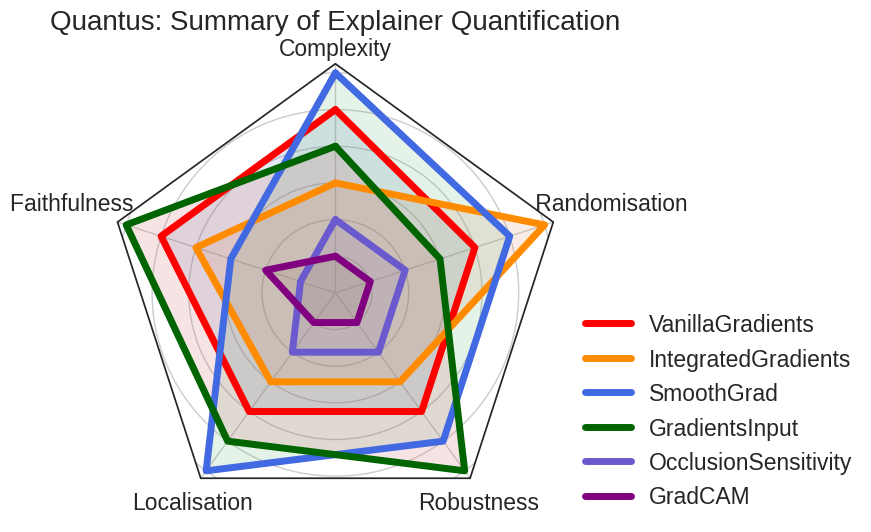

In [ ]:
# Make spyder graph!
data = [df_normalised_rank.columns.values, (df_normalised_rank.to_numpy())]
theta = spyder_plot(len(data[0]), frame='polygon')
spoke_labels = data.pop(0)

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)
for i, (d, method) in enumerate(zip(data[0], xai_methods)):
    line = ax.plot(theta, d, label=method, color=colours_order[i], linewidth=5.0)
    ax.fill(theta, d, alpha=0.15)

# Set lables.
if include_titles:
    ax.set_varlabels(labels=['Complexity', 'Faithfulness          \n', '\nLocalisation', '\nRobustness', '              Randomisation\n'])
else:
    ax.set_varlabels(labels=[])

ax.set_rgrids(np.arange(0, df_normalised_rank.values.max() + 0.5), labels=[])

# Set a title.
ax.set_title("Quantus: Summary of Explainer Quantification",  position=(0.5, 1.1), ha='center', fontsize=20)

# Put a legend to the right of the current axis.
if include_legend:
    ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

## 6.2 Selecting an XAI Method

Given our intuition above, for our tutorial network task, we aim for an explanation that is *robust* towards internal variability in our data, displays significant features (*complexity*) without sacrificing *faithful* evidence, and captures the network parameter behavior (*randomization*).

Although the spyder plot, for completeness, still shows all 5 criteria, we consider only the area cover in **faithfulness, robustness, complexity and randomization**. That means we neglect the spread on the localisation axis.

As we can derive from the spyder plot as well as the Table of the ranks across all explanation methods oftentimes in practice explanation methods only rank highly in some criteria. Although the ideal case would be highest ranks across all our important criteria (full coverage in the spyder plot except for localisation), in this case both SmoothGrad and GradientsInput achieve higher ranks in most criteria we want to be fulfilled for our network task. However, **GradientsInput** presents more faithful and more robust explanations, which is important to analyze if a region of high importance is stable and faithfully displayed in our explanation. Thus, we choose this explanation for our task.

**Note** that GradientsInput could be improved by combining it with SmoothGrad, which currently uses VanillaGradients as the baseline explanation (see Section 4).

## 6.3. Explanation Interpretation

Based on our evaluation we can now interpret the explanation GradientsInput provides for the NA region. Therefore, below, we re-plot the explanations only focussing of the NA region. Similar to section 4.2.2  we show the years $1940,1990,2040,2074$ with the first row depicting the normalized T2M anomalies. However, we only show the determined best-performing XAI method in the row below.

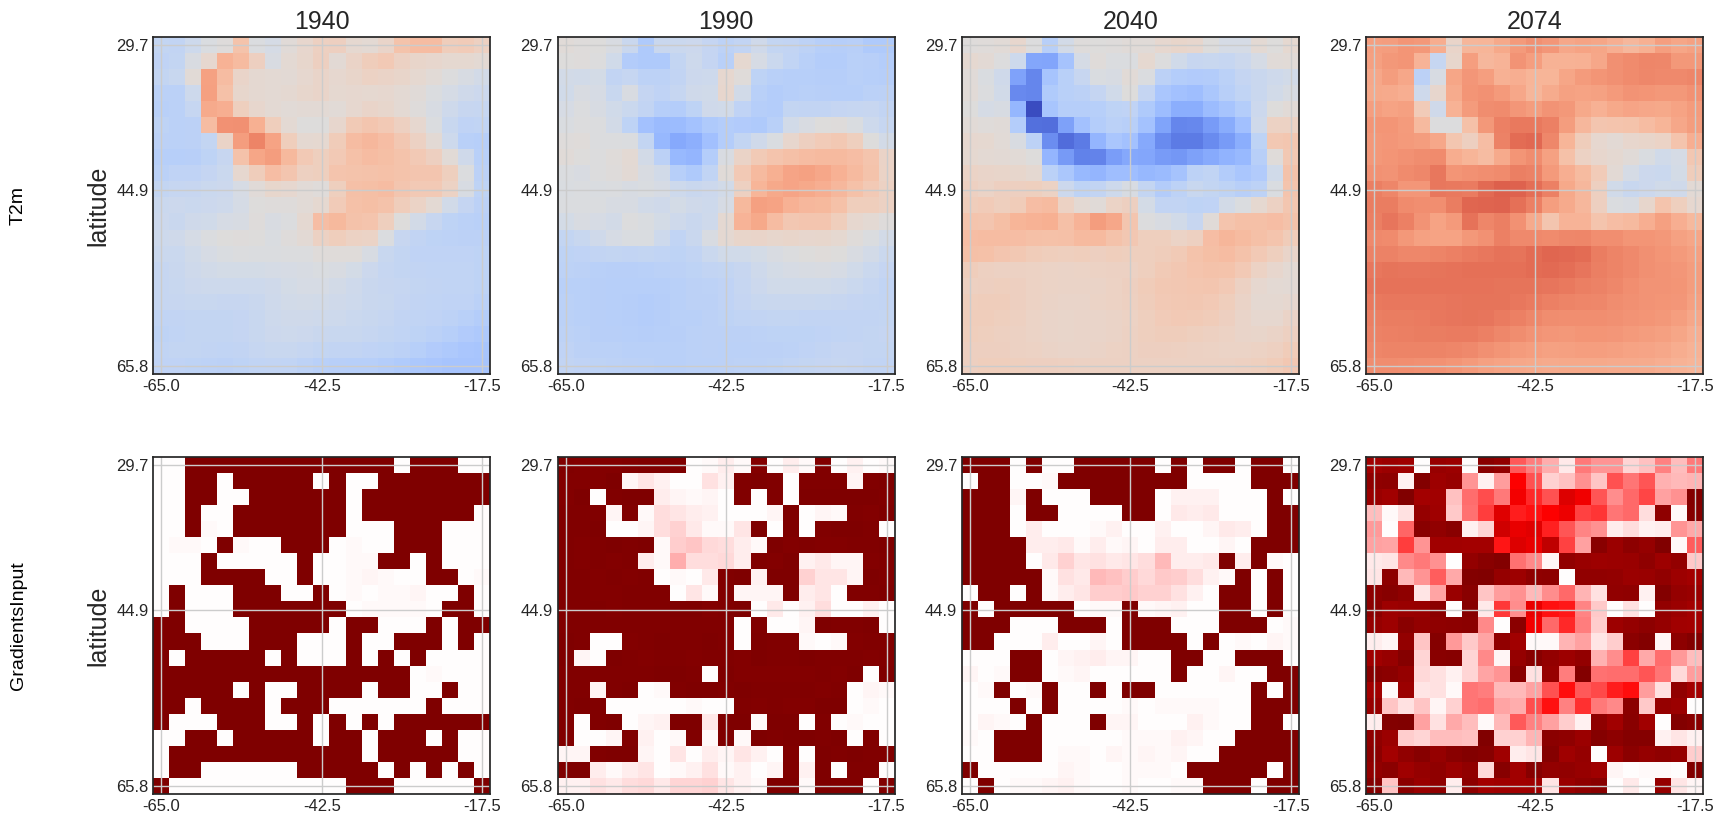

In [ ]:
# Show NA region only for best-performing explanation.
best_xai_n_a = {"GradientsInput": explanations_n_a["GradientsInput"] }

# Define plot kwargs.
plt_kwrgs['explanation'] = best_xai_n_a# which ever is best
plt_kwrgs['figsize'] = (20,10)
plt_kwrgs['keys'] = list(best_xai_n_a.keys())
plt_kwrgs['nrows'] = len(best_xai_n_a)+1

# Plot.
plot_multiple_temperature_maps(samples, x_n_a_samples, year_samples, y_batch_samples, y_pred_samples, lat_n_a, lon_n_a , **plt_kwrgs)

**Explanation Interpretation** We can see here that for years prior to the 20th century ($1940,1990$) the explanations values are higher in surrounding areas than for the distinct cooling/warming patch. In $1940$ we also see no strong explanation value pattern in the area (few clusters of non-white pixels). Starting in $1990$, in the following years, however we can see that the explanations display more and more localized explanation value patterns with higher importance values in the cooling patch/warming hole (blue area in plot above), suggesting that the NA region becomes more and more important towards the mid and end of the 20th century. These findings align with prior research ([Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464)), that adresses the NA warming hole as a feauture caused by and related to climate change. Thus, the explanation validates that the network has learned data features, which can be associated with physical findings related to the network task.
  Now, we can i) be more confident that the network has learned some scientific evidence and ii) can further consider also other regions in the explanation maps possibly even inferring new insights using an explanation method that we have evaluated and chosen according to its properties.



## 6.4 Limitations

XAI evaluation faces certain limitations due to the absence of a reliable ground-truth, which means the evaluation metrics provided can only assess crucial properties that a valid explanation must possess, and cannot provide a complete validation. While the evaluation of XAI methods is a rapidly evolving field, the metrics offered by the Quantus library have certain limitations, such as relying on perturbing the input which may lead to the creation of out-of-distribution inputs. It should be noted that evaluating explanation methods using quantification analysis does not guarantee the theoretical soundness or statistical validity of the methods. Therefore, when using the Quantus library for XAI method selection, it is essential to supplement the results with theoretical considerations.



## 6.5 Next Steps

XAI evaluation can help researchers establish appropriate explanation methods for a specific tasks. These performance measures can help validate network models and prediction as well as insights inferred from explanations.


<a name="references"></a>
# 7) References

*   [Bommer et. al., 2023](https://arxiv.org/abs/2303.00652)
*   [Hedström et al., 2023](https://jmlr.org/papers/v24/22-0142.html)
*   [Labe and Barnes, 2021](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002464)
*   [Kay et al., 2015](https://journals.ametsoc.org/view/journals/bams/96/8/bams-d-13-00255.1.xml)
*   [Hurrell et al., 2013](https://journals.ametsoc.org/view/journals/bams/94/9/bams-d-12-00121.1.xml)
*   [CESM1 data](https://www.cesm.ucar.edu/projects/community-projects/LENS/data-sets.html)



